## IBM HR Analytics Employee Attrition & Performance, Goals and Machine Learning

Attrition is the normal life cycle of employment. Attrition refers to employees who leave their jobs due to normal circumstances. Employee attrition is a common problem in companies. It is not caused by one single factor for every worker in the organization but involves multiple factors which need to be defined and analyzed further to determine the impact which leads to the high attrition rate. The goal is to build a model that can estimate the chances of an employee leaving the company. Overall, the implementation of this model will allow management to create better decision-making actions.

# Load Data

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import csv

#Importing and reading CSV file
file_input = 'C:\\Users\\Sneha Rani\\CapstoneProject-LR\\ibm-hr-attrition.csv'
df1 = pd.read_csv(file_input, index_col=None)
df1.head()

Populating the interactive namespace from numpy and matplotlib


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# My Initial Findings :-

### Which age-group people contribute maximum attrition?

*I first started my analysis by surveying "Age" feature of my dataset. I explored ten most working-age people in the company by using value_counts(). I also plotted bar graph and found that people of Age 34 and 35 are topmost ages employed. Also, the mean age of the people is 37 which is quite close to the top age working employees in the company. This means most of the people belong to mid-age adults and it can be one of the factors for higher attrition.*

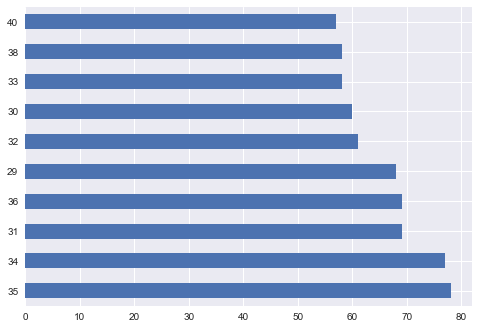

In [2]:
# 10 most popular age people working in company
df1['Age'].value_counts()[:10].plot(kind='barh')

          Young_adults Mid_age_adults Mid_to_old_adults Old_adults
                 count          count             count      count
Attrition                                                         
No                  59            761               355         58
Yes                 38            147                41         11


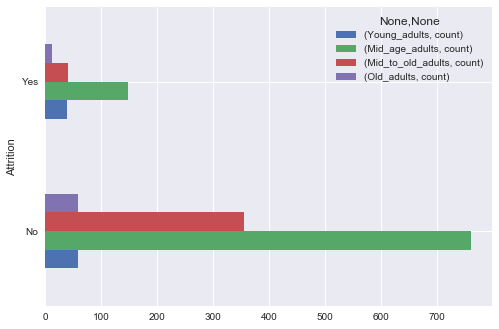

In [3]:
g1 = df1[(df1.Age >=15) & (df1.Age <=24)].groupby('Attrition').agg({'Age': ['count']})
d1 = g1.rename(columns={"Age": "Young_adults"})
g2 = df1[(df1.Age >=25) & (df1.Age <=40)].groupby('Attrition').agg({'Age': ['count']})
d2 = g2.rename(columns={"Age": "Mid_age_adults"})
g3 = df1[(df1.Age >=41) & (df1.Age <=54)].groupby('Attrition').agg({'Age': ['count']})
d3 = g3.rename(columns={"Age": "Mid_to_old_adults"})
g4 = df1[(df1.Age >=55) & (df1.Age <=64)].groupby('Attrition').agg({'Age': ['count']})
d4 = g4.rename(columns={"Age": "Old_adults"})
frames = [d1, d2, d3, d4]
res = pd.concat(frames, axis=1)
res.plot(kind='barh')
print(res)

*So, I further deep dived into that and divided age into four groups: (Age 15-24):- Young_adults (Age 25-40):- Mid_age_adults (Age 41-54):- Mid_to_old_adults (Age 55-64):- Old_adults. Also counted the number of Attrition ('No'/'Yes') for each group and plotted bar graph. From the graph, I found that count of Mid_age_adults are more and they are the highest contributor to Attrition and Old_adults group of people have least attrition rate.*

### What is the count of married people and unmarried people attrition rate? Are married people more prone to attrition?

          Divorced Married Single
             count   count  count
Attrition                        
No             294     589    350
Yes             33      84    120


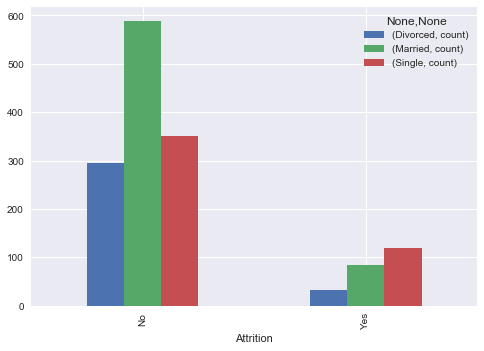

In [4]:
g1 = df1[(df1.MaritalStatus =='Divorced')].groupby('Attrition').agg({'MaritalStatus': ['count']})
d1 = g1.rename(columns={"MaritalStatus": "Divorced"})
g2 = df1[(df1.MaritalStatus =='Married')].groupby('Attrition').agg({'MaritalStatus': ['count']})
d2 = g2.rename(columns={"MaritalStatus": "Married"})
g3 = df1[(df1.MaritalStatus =='Single')].groupby('Attrition').agg({'MaritalStatus': ['count']})
d3 = g3.rename(columns={"MaritalStatus": "Single"})
frames = [d1, d2, d3]
res = pd.concat(frames, axis=1)
res.plot(kind='bar')
print(res)

*Coming to second question survey, we found that based on MaritalStatus, people who are 'Single' are more prone to attrition than people who are married or divorced which is another interesting fact.*

### What is the count of people working OverTime and YearsInCurrentRole? How working overtime (or not), and the years in role relate to employee attrition?

*First I counted the number of employees who have spent the same number of years in their current role.I analyzed that maximum number of employees leaving the company has spent less than a year, between 2-3yrs or 7-8yrs in the company. I further included overtime feature in the above analysis to see if people who are working overtime and spending the same number of years in the company are leaving the company more frequently or not.*

In [5]:
# count of employee leaving the company group by same years in current role
df1[(df1.Attrition =='Yes')].groupby('YearsInCurrentRole').agg({'Attrition': ['count']})

,Attrition
,count
YearsInCurrentRole,
0,73
1,11
2,68
3,16
4,15
5,1
6,2
7,31


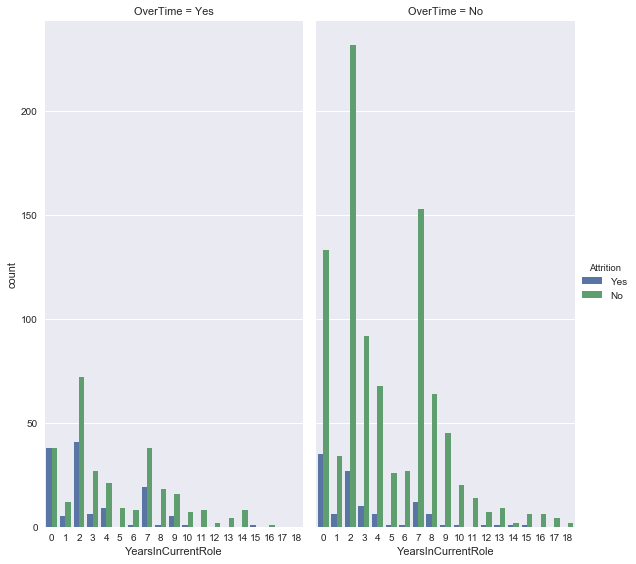

In [6]:
sns.factorplot(x="YearsInCurrentRole", hue="Attrition", col="OverTime", data=df1, kind="count",size=8, aspect=.5)

*After plotting factor plot graph, I observed that people who worked overtime have left the company most.*

### What is the count of attrition of each department on the basis of RelationshipSatisfaction? Does satisfaction level has any impact on employees leaving these departments?

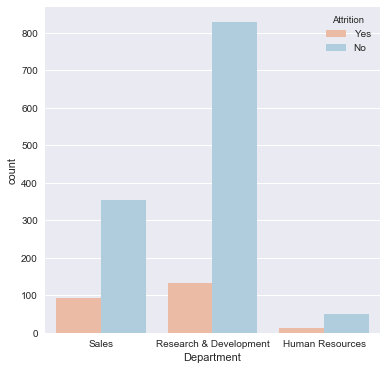

In [8]:
plt.figure(figsize=(6,6))
sns.countplot(x='Department', hue='Attrition', data=df1, palette='RdBu')

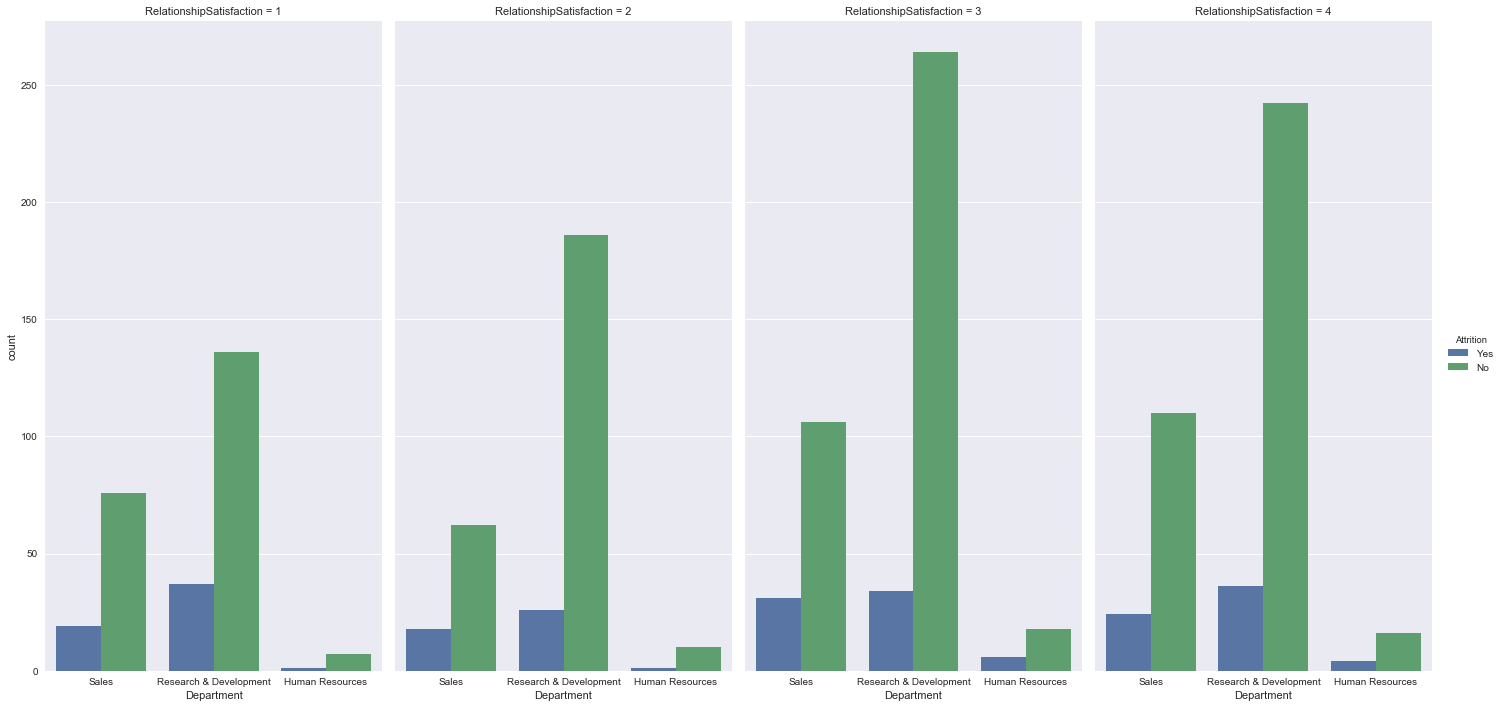

In [9]:
sns.factorplot(x="Department", hue="Attrition", col="RelationshipSatisfaction", data=df1, kind="count",size=10, aspect=.5)

*First I counted attrition on each department by using count plot and observed that research and development field has highest attrition count. Then I added another feature 'RelationshipSatisfaction' to see if the satisfaction level has any impact on employees leaving these departments. After plotting factor plot, I don't see any variance on attrition based on the relationship satisfaction feature. All four different levels (Low, Medium, High, Very High) has the similar number of attrition.*

### Do JobSatisfaction and JobRole impact gradual loss of employees? Are these two features have a common pattern?

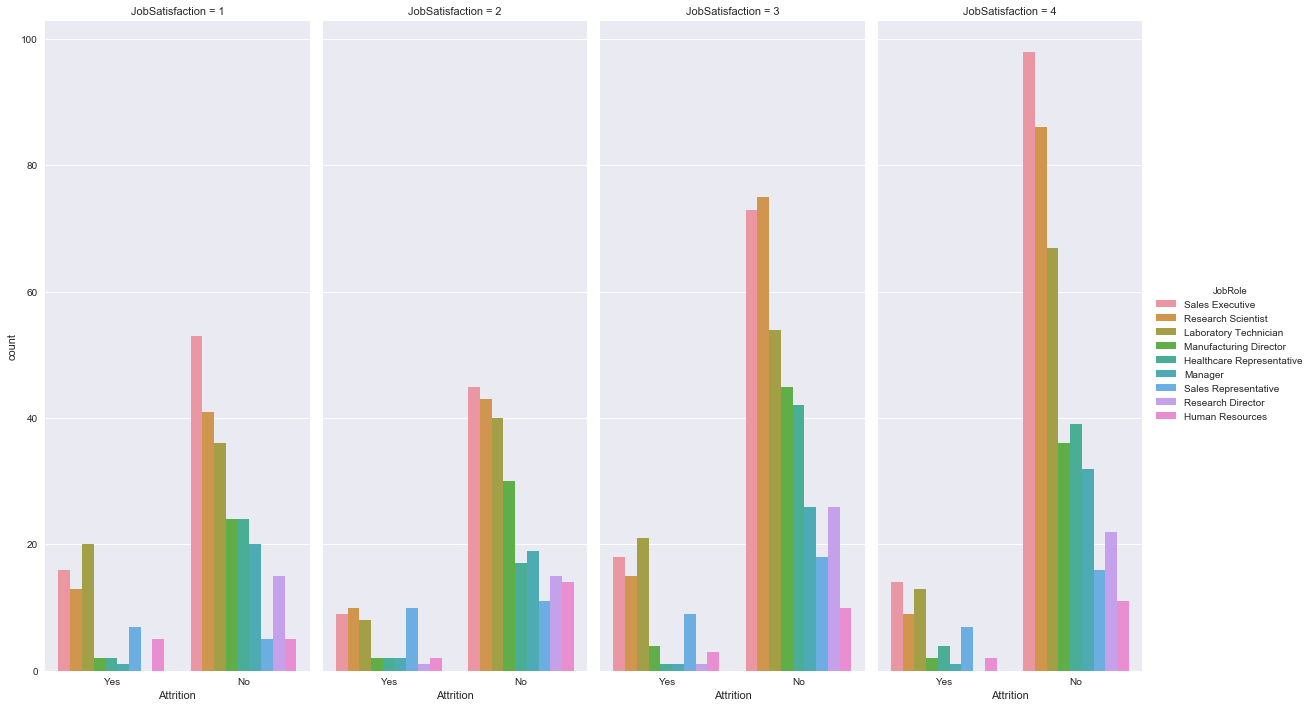

In [10]:
sns.factorplot(x="Attrition", hue="JobRole", col="JobSatisfaction", data=df1, kind="count",size=10, aspect=.4)

*From the plotted graph based on JobRole and JobSatisfaction feature, I see that employees in these roles(Sales Executive, Research Scientist, Laboratory Technician) leave the company most if they have low job satisfaction or high job satisfaction(which is not very high). Sales Representative employees count of attrition are very similar under all job satisfaction levels.*

In [30]:
# Pre cleaned the dataset by removing some of the insignificant columns
df2 = df1[['Age','Attrition','BusinessTravel','Department','DistanceFromHome','Education','EducationField',
           'EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome',
           'NumCompaniesWorked','OverTime','PercentSalaryHike','RelationshipSatisfaction','TotalWorkingYears',
           'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
df2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,94,...,8,Yes,11,1,8,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,61,...,1,No,23,4,10,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,92,...,6,Yes,15,2,7,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,56,...,1,Yes,11,3,8,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,40,...,9,No,12,4,6,3,2,2,2,2


### Wrapping up by visualizing  how each feature of my dataset have an impact on the Attrition

1)**JobRole:** Employees leaving company has a higher impact on job role as the majority are more from Laboratory Technician, Research  Scientist, and Sales Executive.

2)**BusinessTravel:** Employees leaving organization has been seen traveling more.

3)**Department:** Employees leaving HR department are less in number and proportion of the total number of HR employees are also less in the ratio as compared to other departments.

4)**DistanceFromHome:** Employees leaving the company is almost uniformly distributed either traveling from a nearby place or far.

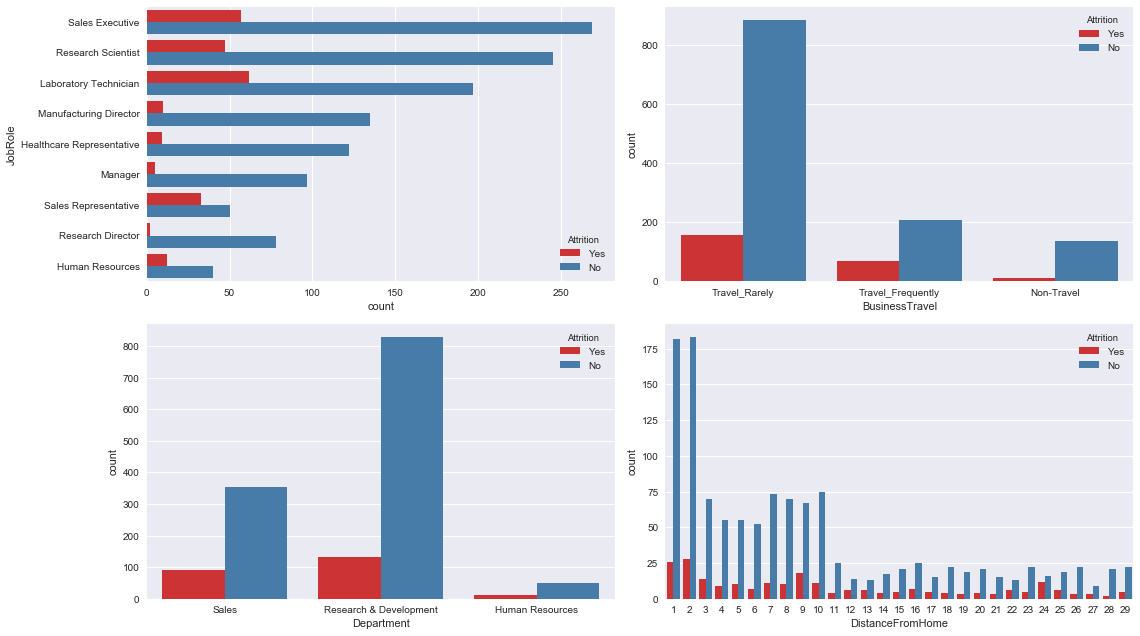

In [31]:
sns.set()
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,9))
sns.countplot(y='JobRole', hue='Attrition', data=df2, ax=ax1, palette='Set1')
sns.countplot(x='BusinessTravel', hue='Attrition', data=df2, ax=ax2, palette='Set1')
sns.countplot(x='Department', hue='Attrition', data=df2, ax=ax3, palette='Set1')
sns.countplot(x='DistanceFromHome', hue='Attrition', data=df2, ax=ax4, palette='Set1')
sns.set_style('dark')
plt.tight_layout()


5)**Education:** Employees leaving organization doesn't show the higher impact on education as it is somewhat same for all levels(below college, college, bachelor, master) except doctor which shows a lower percentage of attrition.

6)**EducationField:** There are people employed from various education field in which HR and other field show huge downfall with respect to attrition rate.

7)**EnvironmentSatisfaction:** All the categories (low, medium, high, very high) under this feature contribute similar to the attrition rate and seems like all are equally distributed.

8)**Gender:** Male employees leaving the organization has the higher percentage of attrition as compared to female employees.Even though when I consider it as a whole, does not have much impact.

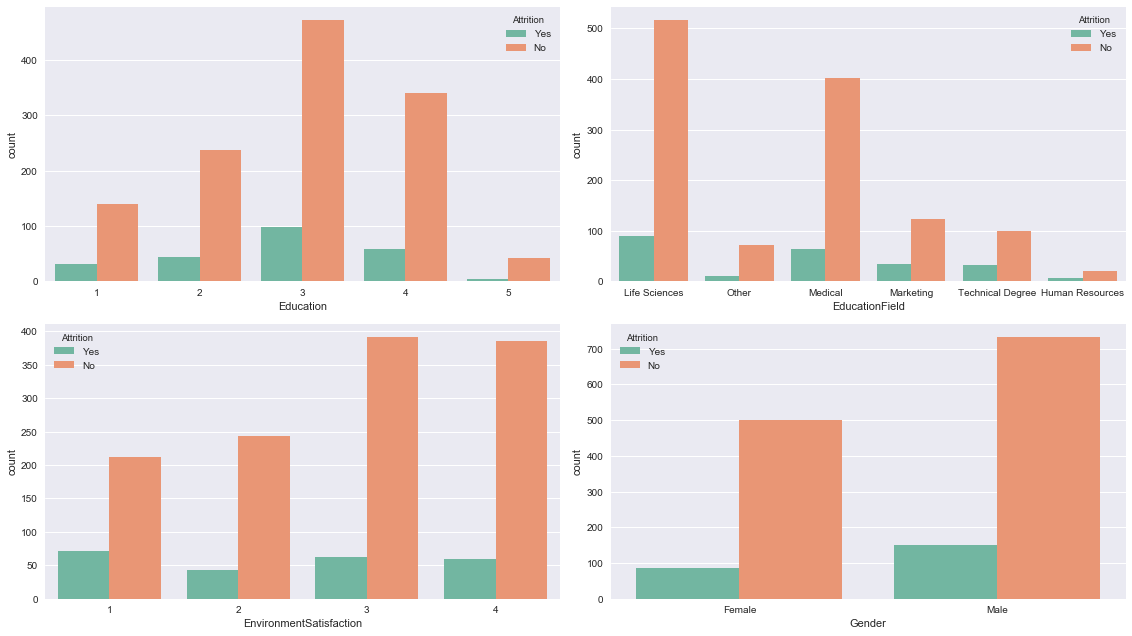

In [32]:
sns.set()
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,9))
sns.countplot(x='Education', hue='Attrition', data=df2, ax=ax1, palette='Set2')
sns.countplot(x='EducationField', hue='Attrition', data=df2, ax=ax2, palette='Set2')
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df2, ax=ax3, palette='Set2')
sns.countplot(x='Gender', hue='Attrition', data=df2, ax=ax4, palette='Set2')
plt.tight_layout()

9)**OverTime:** Percentage of employees working overtime leave company more.

10)**JobSatisfaction:** As per metadata 1 ‘Low’ 2 ‘Medium’ 3 ‘High’ 4 ‘Very High’. We see higher attrition levels in among lower Job Satisfaction levels.

11)**MaritalStatus:** Employees who are 'Single' are more prone to attrition than people who are married or divorced which is another interesting fact.

12)**NumCompaniesWorked:** We see that employees  working in One organization quit a lot.

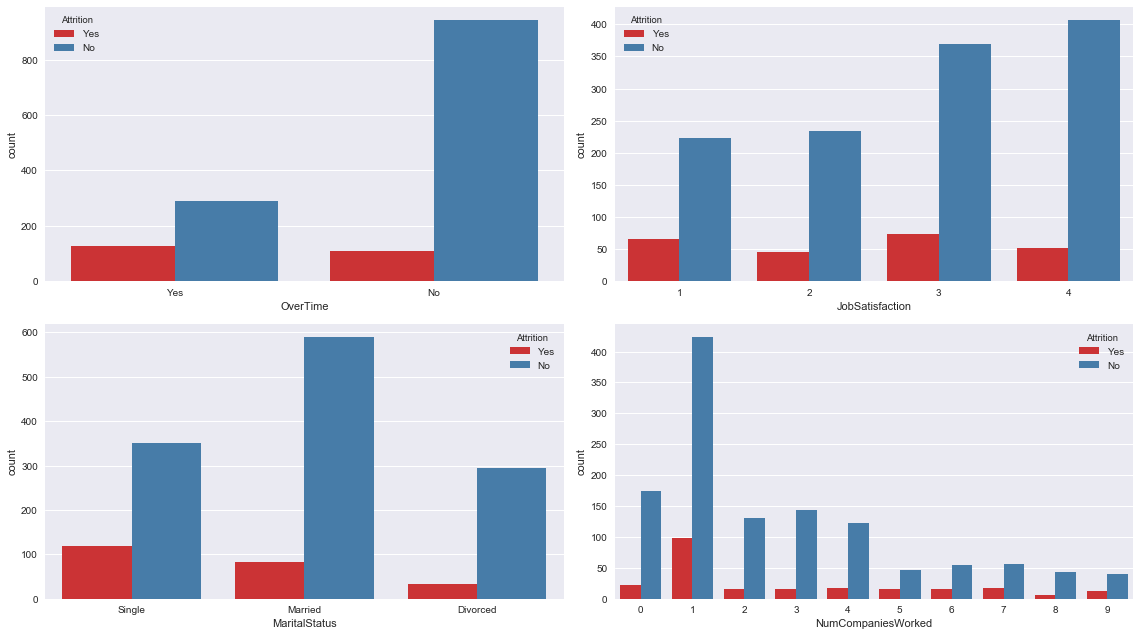

In [33]:
sns.set()
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,9))
sns.countplot(x='OverTime', hue='Attrition', data=df2, ax=ax1, palette='Set1')
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df2, ax=ax2, palette='Set1')
sns.countplot(x='MaritalStatus', hue='Attrition', data=df2, ax=ax3, palette='Set1')
sns.countplot(x='NumCompaniesWorked', hue='Attrition', data=df2, ax=ax4, palette='Set1')
plt.tight_layout()

13)**PercentSalaryHike:** Employees receiving a different level of percent salary hike contribute to attrition rate. We also see that employees leaving organization are more in numbers having less than 15% hike.

14)**RelationshipSatisfaction:** ‘Low’ 2 ‘Medium’ 3 ‘High’ 4 ‘Very High’. The higher number of employees with 3 or more rating have more chances of leaving the company but large proportions of 1 & 2 rating are also leaving the most.

15)**TotalWorkingYears:** Employees having less than one year of experience quit company the most.
 
16)**WorkLifeBalance:** Ratings as per Metadata is 1 ‘Bad’ 2 ‘Good’ 3 ‘Better’ 4 ‘Best’. As expected larger proportion of 1 rating quit, but absolute number wise 2 & 3 are on higher side.

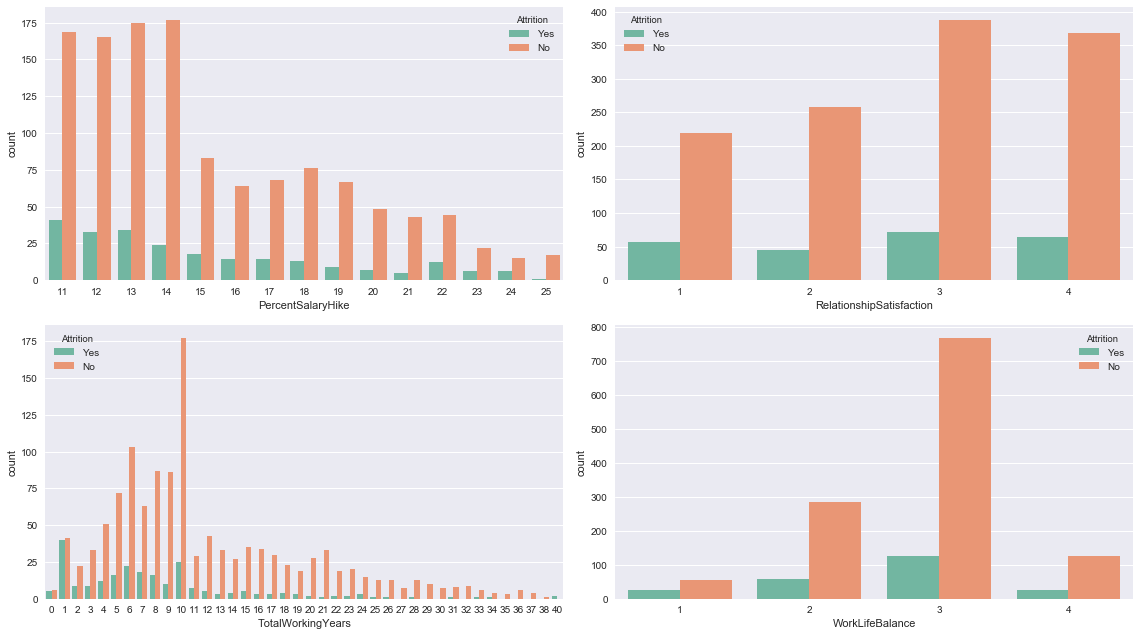

In [34]:
sns.set()
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,9))
sns.countplot(x='PercentSalaryHike', hue='Attrition', data=df2, ax=ax1, palette='Set2')
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df2, ax=ax2, palette='Set2')
sns.countplot(x='TotalWorkingYears', hue='Attrition', data=df2, ax=ax3, palette='Set2')
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df2, ax=ax4, palette='Set2')
plt.tight_layout()

17)**YearsAtCompany:** Employees spending less than 10 years contribute most to the attrition rate and also 
has the maximum attrition rate of freshers. 

18)**YearsInCurrentRole:** Maybe change in job role a major factor for leaving the organization as the larger proportion with just 0-2 years is quitting most.

19)**YearsSinceLastPromotion:** Maximum number of employees who have been promoted recently are more in numbers, quitting the organization.

20)**YearsWithCurrManager:** I see that new Managers who have recently joined the organization is a big cause for employees leaving the company.

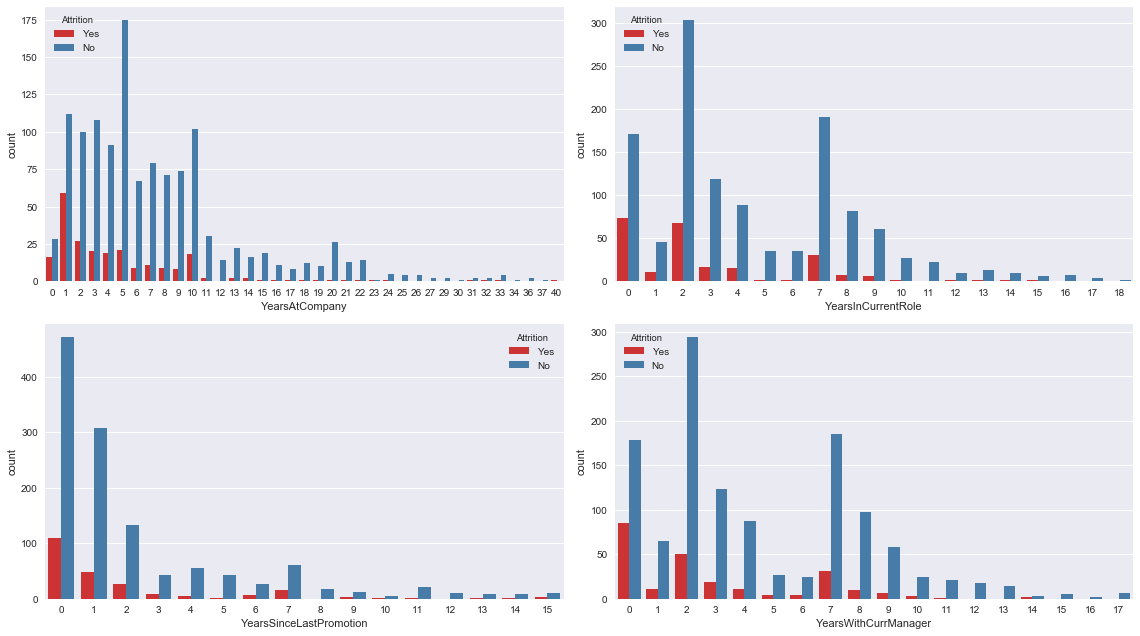

In [35]:
sns.set()
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,9))
sns.countplot(x='YearsAtCompany', hue='Attrition', data=df2, ax=ax1, palette='Set1')
sns.countplot(x='YearsInCurrentRole', hue='Attrition', data=df2, ax=ax2, palette='Set1')
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=df2, ax=ax3, palette='Set1')
sns.countplot(x='YearsWithCurrManager', hue='Attrition', data=df2, ax=ax4, palette='Set1')
plt.tight_layout()

21)**MonthlyIncome:** I see higher levels of attrition among the lower segment of monthly income. It might be due to the income disparity with efforts in the work.

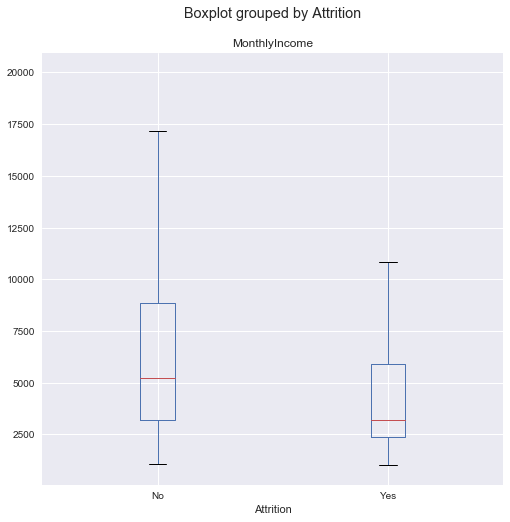

In [36]:
df2.boxplot(column='MonthlyIncome',        # Column to plot
                 by= 'Attrition',         # Column to split upon
                 figsize= (8,8))

# Applying Inferential Statistics using Chi-square Contingency for my further findings :

We are now trying to use statistical inference, hypothesis testing, regression, correlation and their applications such as in A/B testing for discovering and communicating insights from data and drawing conclusions and predicting outcomes.

## Is Age statistically impacting the Attrition Rate?

*As I stated earlier while finding age-group having the maximum contribution, I analyzed from the graph that count of Mid_age_adults are more and they are the highest contributor for Attrition and Old_adults group of people have least attrition rate. So in order to check whether 'Age' is one of the factors which is affecting attrition, we further dived by using the statistical inferential technique by finding the relationship between two variables 'Age' and 'Attrition'.*

*Since Attrition and Age Group were both categorical variables, I decided to use Chi-Square contingency test to find the dependency between these two variables using chi2_contingency() function.*

*Age grouping is done earlier show list table with Attrition Rate count. This table can't be used in Chi-Square contingency test as it expects a data frame as an input. So we organized the 'Age' feature into categorical data format by using cut() function on data frame and introduced new column named 'Age_group_name'.*

In [20]:
g1 = df1[(df2.Age >=15) & (df2.Age <=24)].groupby('Attrition').agg({'Age': ['count']})
d1 = g1.rename(columns={"Age": "Young_adults"})
g2 = df1[(df2.Age >=25) & (df2.Age <=40)].groupby('Attrition').agg({'Age': ['count']})
d2 = g2.rename(columns={"Age": "Mid_age_adults"})
g3 = df1[(df2.Age >=41) & (df2.Age <=54)].groupby('Attrition').agg({'Age': ['count']})
d3 = g3.rename(columns={"Age": "Mid_to_old_adults"})
g4 = df1[(df2.Age >=55) & (df2.Age <=64)].groupby('Attrition').agg({'Age': ['count']})
d4 = g4.rename(columns={"Age": "Old_adults"})
frames = [d1, d2, d3, d4]
res = pd.concat(frames, axis=1)
print(res)

          Young_adults Mid_age_adults Mid_to_old_adults Old_adults
                 count          count             count      count
Attrition                                                         
No                  59            761               355         58
Yes                 38            147                41         11


In [21]:
age_bins = [15,25,40,55,65] # age cut-off 
age_labels= ['Young_adults', 'Mid_age_adults', 'Mid_to_old_adults', 'Old_adults'] # label for above range
df2['Age_group'] = pd.cut(df2['Age'],age_bins,labels=age_labels,right=True,include_lowest=True)
df2.head()

F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobRole,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_group
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,Sales Executive,...,Yes,11,1,8,1,6,4,0,5,Mid_to_old_adults
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,Research Scientist,...,No,23,4,10,3,10,7,1,7,Mid_to_old_adults
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,Laboratory Technician,...,Yes,15,2,7,3,0,0,0,0,Mid_age_adults
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,Research Scientist,...,Yes,11,3,8,3,8,7,3,0,Mid_age_adults
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,Laboratory Technician,...,No,12,4,6,3,2,2,2,2,Mid_age_adults


**Null hypothesis (H0):** *The 2 categorical variables are independent (there is no relationship between the variables)*

**Alternate hypothesis (H1):** *The 2 categorical variables are dependent (there is a relationship between the variables)*

### Chi_Contingency test for deciding independence between two variables Attrition and Age_group

In [23]:
import ipy_table as tbl
table = pd.crosstab([df2['Attrition']], df2['Age_group'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Item', 'Value'],
    ['Chi-Square Test', chi2],
    ['P-Value', p],
]
tbl.make_table(results)

Item,Value
Chi-Square Test,44.8397
P-Value,0.0000


*Chi-square contingency test reveals that potential dependency between two variable 'Age_Group' and 'Attrition' is statistically significant.Thus we can reject the null hypothesis because p-value is sufficiently small ( below the threshold value of 0.05 ).*

## Do male or female of different age groups impact differently to the employee attrition? 

In [24]:
# Table of Gender with different age groups with attrition 
attrition_relation = pd.crosstab(index=df2["Attrition"], 
                             columns=[df2["Age_group"],df2["Gender"]
                                      ],
                             margins=True)   # Include row and column totals

attrition_relation

Age_group Young_adults      Mid_age_adults      Mid_to_old_adults       \
Gender          Female Male         Female Male            Female Male   
Attrition                                                                
No                  25   54            301  440               157  217   
Yes                 18   26             51   90                15   29   
All                 43   80            352  530               172  246   

Age_group Old_adults        All  
Gender        Female Male        
Attrition                        
No                18   21  1233  
Yes                3    5   237  
All               21   26  1470

In [25]:
# Table of Gender with different age groups with attrition shown in percentage
attrition_relation/attrition_relation.loc["All"]*100

Age_group Young_adults        Mid_age_adults             Mid_to_old_adults  \
Gender          Female   Male         Female        Male            Female   
Attrition                                                                    
No           58.139535   67.5      85.511364   83.018868          91.27907   
Yes          41.860465   32.5      14.488636   16.981132           8.72093   
All         100.000000  100.0     100.000000  100.000000         100.00000   

Age_group              Old_adults                     All  
Gender           Male      Female        Male              
Attrition                                                  
No          88.211382   85.714286   80.769231   83.877551  
Yes         11.788618   14.285714   19.230769   16.122449  
All        100.000000  100.000000  100.000000  100.000000

#### *Here we see something quite interesting:*

*As seen from above table, Male and Female in Young_adults age group leaving the company is having higher percentage even though they are less in number compared to Male and Female of Mid_age_adults.*

In [26]:
# Table of Attrition vs. Gender
attrition_gender = pd.crosstab(index=df2["Attrition"], 
                           columns=df2["Gender"],
                              margins=True)
attrition_gender

Gender,Female,Male,All
Attrition,,,
No,501,732,1233
Yes,87,150,237
All,588,882,1470


In [27]:
# Table of Attrition vs. Gender shown in percentage
attrition_gender/attrition_gender.loc['All']*100

Gender,Female,Male,All
Attrition,,,
No,85.204082,82.993197,83.877551
Yes,14.795918,17.006803,16.122449
All,100.000000,100.000000,100.000000


In [28]:
#Chi_Contingency test for deciding independence between two variables Attrition and Gender
import ipy_table as tbl
table = pd.crosstab([df2['Attrition']], df2['Gender'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
result = [
    ['Item', 'Value'],
    ['Chi-Square Test', chi2],
    ['P-Value', p],
]
tbl.make_table(result)

Item,Value
Chi-Square Test,1.1170
P-Value,0.2906


*Even though Male and Female contribute to the attrition rate, Chi-Square Test of Independence result shows high p-value(0.2906) which is not sufficiently small, so we cannot reject the null hypothesis.Since the p-value is higher than threshold p-value of 0.05 we cannot reject the null hypothesis. As of now, I think it may be not useful to include as a feature in a predictive model, but we don't know until we try all the variables in machine learning model.*

**Note:**

**References: https://web.stanford.edu/class/psych252/cheatsheets/chisquare.html#way-classification-contingency-test**

# Is My Model Ready To Apply Machine Learning Algorithms ?

After figuring out my initial findings and having laid a foundation in Inferential Statistics and Hypothesis Testing, it's time to see those ideas in action by implementing the best model and applying Machine Learning Algorithms based on my dataset.
So, basically we need to first understand what do we mean by Machine Learning ? It's actually an art and science of giving computers the ability to learn to make decisions from data without being explicitly programmed.

As I am dealing with IBM Employee Attrition dataset, my goal is to know the contribution of varied factors and predict which factors contribute the most to employee attrition, seeing all these qualities I am now able to tell where my dataset falls under ? As my dataset comes under supervised learning I need to predict the target variable (which is 'Attrition') for this dataset, given the predictor variables. As my dataset is clearly labeled and belongs to categorical value, I need to perform classification task.

## Preparing My Model

###  Do ' IBM HR Analytics Employee Attrition & Performance ' dataset contain Categorical Variables ?
**- Create dummy variables for categorical variables :**

*First I need to check datatypes from Employee Attrition dataset. Then, I need to convert categorical variables to dummy variables before they can be used for modelling.*

In [37]:
# Converting strings to categorical values
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df2['Attrition'] = number.fit_transform(df2['Attrition'].astype('str'))
df2.head()

F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,94,...,8,Yes,11,1,8,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,61,...,1,No,23,4,10,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,92,...,6,Yes,15,2,7,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,56,...,1,Yes,11,3,8,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,40,...,9,No,12,4,6,3,2,2,2,2


In [38]:
# Replacing numeric categorical features data with categorical values

grade = {"Education":{1: "Below College", 2:"College", 3:"Bachelor", 4:"Master", 5:"Doctor"},
       "EnvironmentSatisfaction":{1: "Low", 2:"Medium", 3:"High", 4:"Very High"},
       "JobInvolvement":{1:"Low", 2:"Medium", 3:"High", 4:"Very High"}, 
       "JobSatisfaction":{1:"Low", 2:"Medium", 3:"High", 4:"Very High"},  
       "RelationshipSatisfaction":{1:"Low", 2:"Medium", 3:"High", 4:"Very High"},
       "WorkLifeBalance":  {1: "Bad", 2:"Good", 3:"Better", 4:"Best"},
      }
df2.replace(grade, inplace=True)
df2.head()

F:\Anaconda3\lib\site-packages\pandas\core\generic.py:3855: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,College,Life Sciences,Medium,Female,94,...,8,Yes,11,Low,8,Bad,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,Below College,Life Sciences,High,Male,61,...,1,No,23,Very High,10,Better,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,College,Other,Very High,Male,92,...,6,Yes,15,Medium,7,Better,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,Master,Life Sciences,Very High,Female,56,...,1,Yes,11,High,8,Better,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,Below College,Medical,Low,Male,40,...,9,No,12,Very High,6,Better,2,2,2,2


In [39]:
# Creating dummy variables on categorical data for easy interpretation

final_data = pd.get_dummies(df2, columns =['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction',
                                     'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 
                                     'RelationshipSatisfaction', 'WorkLifeBalance'])
final_data.head()

,Age,Attrition,DistanceFromHome,HourlyRate,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,...,OverTime_No,OverTime_Yes,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Bad,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,41,1,1,94,5993,8,11,8,6,4,...,0,1,0,1,0,0,1,0,0,0
1,49,0,8,61,5130,1,23,10,10,7,...,1,0,0,0,0,1,0,0,1,0
2,37,1,2,92,2090,6,15,7,0,0,...,0,1,0,0,1,0,0,0,1,0
3,33,0,3,56,2909,1,11,8,8,7,...,0,1,1,0,0,0,0,0,1,0
4,27,0,2,40,3468,9,12,6,2,2,...,1,0,0,0,0,1,0,0,1,0


### Final Data To Build My Model :

In [40]:
# Move the reponse variable "Attrition" to the front of the table

front = final_data['Attrition']
final_data.drop(labels=['Attrition'], axis=1, inplace = True)
final_data.insert(0, 'Attrition', front)
final_data.head()

,Attrition,Age,DistanceFromHome,HourlyRate,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,...,OverTime_No,OverTime_Yes,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Bad,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,1,41,1,94,5993,8,11,8,6,4,...,0,1,0,1,0,0,1,0,0,0
1,0,49,8,61,5130,1,23,10,10,7,...,1,0,0,0,0,1,0,0,1,0
2,1,37,2,92,2090,6,15,7,0,0,...,0,1,0,0,1,0,0,0,1,0
3,0,33,3,56,2909,1,11,8,8,7,...,0,1,1,0,0,0,0,0,1,0
4,0,27,2,40,3468,9,12,6,2,2,...,1,0,0,0,0,1,0,0,1,0


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale

# Defining the first parameter 

X = final_data.iloc[:, 1:65].values
print("X: ", type(X), X.shape)

X:  <class 'numpy.ndarray'> (1470, 64)


In [42]:
# Defining the second parameter 

y = final_data.iloc[:, 0].values
print("y: ", type(y), y.shape)

y:  <class 'numpy.ndarray'> (1470,)


**Note:** All classification problems can be represented, as shown above, with a matrix X and a vector y.

In [44]:
final_data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

## Training and Test Datasets
When fitting models, we would like to ensure two things:

* We have found the best model (in terms of model parameters).
* The model is highly likely to generalize i.e. perform well on unseen data.

I will try first by building logistic regression base line model using 'L1' and 'L2' regularization by :
* Splitting the data into a training and test (hold-out) set
* Train on the training set, and test for accuracy on the testing set

### Logistic Regression Base Line Model using 'L2' regularization

In [47]:
# Split the data into training and test sets
# Stratify parameter makes a split so that proportion of values in the sample produced will be same as proportion of values
# provided to parameter stratify.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, stratify=y)

# Build the Logistic Regression Model using default 'L2' regularization

classifier = LogisticRegression()

# Fit the model on the trainng data.
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
# Print the accuracy from the testing data.
y_predict_test = classifier.predict(X_test)
print("\n")
print("[Test] Accuracy score:" ,accuracy_score(y_predict_test, y_test))

# Print the accuracy from the training data.
y_predict_train = classifier.predict(X_train)
print("\n")
print("[Training] Accuracy score:" ,accuracy_score(y_predict_train, y_train))



[Test] Accuracy score: 0.872282608696


[Training] Accuracy score: 0.895644283122


In [49]:
# Classification report using 'L2' regularization 

from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report:]")
print(classification_report(y_train, y_predict_train))

print("[Test Classification Report:]")
print(classification_report(y_test, y_predict_test))

[Training Classification Report:]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94       924
          1       0.82      0.46      0.58       178

avg / total       0.89      0.90      0.88      1102

[Test Classification Report:]
             precision    recall  f1-score   support

          0       0.89      0.96      0.93       309
          1       0.68      0.39      0.49        59

avg / total       0.86      0.87      0.86       368



### Logistic Regression Base Line Model using 'L1' regularization

In [50]:
# Build the Logistic Regression Model using 'L1' regularization
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

classifier_1 = LogisticRegression(penalty = 'l1')

# Fit the model on the trainng data.
classifier_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
# Checking the model's accuracy from the testing data.
y_predict_test_1 = classifier_1.predict(X_test)
print("\n")
print("[Test] Accuracy score:" ,accuracy_score(y_predict_test_1, y_test))

# Checking the model's accuracy from the training data.
y_predict_train_1 = classifier_1.predict(X_train)
print("\n")
print("[Training] Accuracy score:" ,accuracy_score(y_predict_train_1, y_train))



[Test] Accuracy score: 0.872282608696


[Training] Accuracy score: 0.893829401089


In [52]:
# Classification report using 'L1' regularization 

from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report:]")
print(classification_report(y_train, y_predict_train_1))

print("[Test Classification Report:]")
print(classification_report(y_test, y_predict_test_1))

[Training Classification Report:]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94       924
          1       0.82      0.44      0.57       178

avg / total       0.89      0.89      0.88      1102

[Test Classification Report:]
             precision    recall  f1-score   support

          0       0.89      0.96      0.93       309
          1       0.68      0.39      0.49        59

avg / total       0.86      0.87      0.86       368



## Tuning the Model

*In Logistic Regression, the most important parameter to tune is the *regularization parameter* `C`. For tuning the parameters of my  model, I will use **Grid Search** which is very important, because we need to make sure that our model is general and it works beyond our data sets. In other words it should ideally work on data it has never seen.*

### Finding resulting model "M"  using best hyper-parameter and corresponding penalty

*From the Logistic Regression Base Line Model using 'L1' and 'L2' regularization done earlier, we see in classification report that the performance metric using penalty 'L1' is more or less same of 'L2' but while comparing recall value we see that 'L2' is better as it has slightly higher recall value than 'L1' in training data classification report.*

*So, we choose penalty 'L2' which is default one for Logistic Regression and further tune the model using best hyperparameter.*

#### Best Hyperparameter Tuning using GridSearchCV in scikit-learn using 'L2' 

In [54]:
# Trying to estimate how this model will predict on unseen data by tuning the model

from sklearn.grid_search import GridSearchCV
Cs = [0.001, 0.1, 1, 10, 100]
param_grid = dict(C=Cs)
print(param_grid)

{'C': [0.001, 0.1, 1, 10, 100]}


In [55]:
# instantiate the grid
classifier_gcv = LogisticRegression()
grid = GridSearchCV(classifier_gcv, param_grid, scoring='accuracy')

In [56]:
# Fit the model on the trainng data.
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='accuracy', verbose=0)

In [57]:
grid.grid_scores_

[mean: 0.83938, std: 0.00205, params: {'C': 0.001},
 mean: 0.86298, std: 0.01018, params: {'C': 0.1},
 mean: 0.86751, std: 0.00902, params: {'C': 1},
 mean: 0.86570, std: 0.00937, params: {'C': 10},
 mean: 0.86661, std: 0.01164, params: {'C': 100}]

In [58]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.867513611615245
{'C': 1}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


*After analyzing the performance of L1 and L2 regularization and applying best hyper-parameter found using GridSearch, we create **resulting model 'M'** which identify the best combination of **penalty = 'L2'** (default) and the value of **C = '1'**.*

In [59]:
M = LogisticRegression(C=1)
M.fit(X_train, y_train)
print(accuracy_score(M.predict(X_test), y_test))

0.872282608696


In [60]:
# Classification report using 'L2' regularization 

from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report:]")
print(classification_report(y_train, M.predict(X_train)))

print("[Test Classification Report:]")
print(classification_report(y_test, M.predict(X_test)))

[Training Classification Report:]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94       924
          1       0.82      0.46      0.58       178

avg / total       0.89      0.90      0.88      1102

[Test Classification Report:]
             precision    recall  f1-score   support

          0       0.89      0.96      0.93       309
          1       0.68      0.39      0.49        59

avg / total       0.86      0.87      0.86       368



## Trying Different Algorithms 

### 1. Using Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# Print the accuracy from the testing data.
print('Random Forest Accuracy: {:.2f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.85


### 2. Using Decision Tree Classifier (CART)

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
# Print the accuracy from the testing data.
print('Decision Tree Accuracy(CART): {:.2f}'.format(accuracy_score(y_test, dtree.predict(X_test))))

Decision Tree Accuracy(CART): 0.80


### 3. Using AdaBoost Classifier

In [63]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
# Print the accuracy from the testing data.
print('AdaBoost Accuracy: {:.2f}'.format(accuracy_score(y_test, ada.predict(X_test))))

AdaBoost Accuracy: 0.87


#### Preparing Comparison Table Results using different Algorithms

In [64]:
from sklearn.metrics import precision_recall_fscore_support as score

print('All Results across Models on Test Dataset')
print('-------------------------------------------------------------------------------')
print('Name    Class     Precision             Recall                Fscore    Support')
report = []
report.append(('LR   ',M))
report.append(('ADA  ',ada))
report.append(('DTREE',dtree))
report.append(('RF   ',rf))

for name, model in report:
    precision, recall, fscore, support = score(y_test, model.predict(X_test))
    message = "%s: %s %s %s %s %s " % (name, 'Class 0', format(precision[0]), format(recall[0]), format(fscore[0]), format(support[0]))
    message_1 = "%s: %s %s %s %s %s " % (name, 'Class 1', format(precision[1]), format(recall[1]), format(fscore[1]), format(support[1]))
    print(message)
    print(message_1)
    print('\n')

All Results across Models on Test Dataset
-------------------------------------------------------------------------------
Name    Class     Precision             Recall                Fscore    Support
LR   : Class 0 0.8922155688622755 0.9644012944983819 0.9269051321928461 309 
LR   : Class 1 0.6764705882352942 0.3898305084745763 0.49462365591397844 59 


ADA  : Class 0 0.9012345679012346 0.9449838187702265 0.9225908372827805 309 
ADA  : Class 1 0.6136363636363636 0.4576271186440678 0.5242718446601942 59 


DTREE: Class 0 0.8823529411764706 0.8737864077669902 0.8780487804878048 309 
DTREE: Class 1 0.3709677419354839 0.3898305084745763 0.3801652892561984 59 


RF   : Class 0 0.8571428571428571 0.9902912621359223 0.9189189189189189 309 
RF   : Class 1 0.7272727272727273 0.13559322033898305 0.2285714285714286 59 




## ROC Graph using Different Models

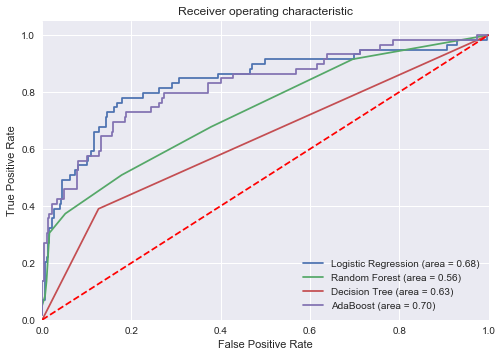

In [65]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, M.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, M.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])


dtree_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])

ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

*From the above ROC Graph, we see **AdaBoost Model** has highest area under curve value of 0.70 and it is closest to the top left corner which is one of the criteria for a good model. Next good model as per ROC curve is the Logistic Regression model.*

#### Why recall score in classification report has been given more importance?

In [66]:
# Comparing Recall scores of different Models
from sklearn.metrics import recall_score
print('Recall Results across Models')
print('----------------------------')
report = []
report.append(('LR   ',M))
report.append(('ADA  ',ada))
report.append(('DTREE',dtree))
report.append(('RF   ',rf))

for name, model in report:
    message = "%s:                 %f " % (name, recall_score(y_test, model.predict(X_test)))
    print (message)
#print(recall_score(y_test, ada.predict(X_test)))

Recall Results across Models
----------------------------
LR   :                 0.389831 
ADA  :                 0.457627 
DTREE:                 0.389831 
RF   :                 0.135593 


*Based on the above results across different models, we see that the AdaBoost has the highest recall score.When an employee left the company, how often the model predict that correctly depends on the "recall" score.*

*High recall score means when employees left the company, model predicted correctly most of the time.*

**Note: A good recall score is important to avoid unpredicted loss of the employees in the company.**

## Feature Importance

Here, I am trying to compute the relative importance of each attribute by finding highest positive and negative coefficient by absolute value. These importance values can be further used to inform a feature selection process.

### Feature Importance using resulting logistic regression model 'M'

In [67]:
# Using Scikit-Learn to find Coefficient with indices
df_coefs = pd.DataFrame(M.coef_[0], index= final_data.iloc[:, 1:65].columns, columns=['Coefficient'])
# Sorting Coefficient in descending order
df_sorted = df_coefs.sort_values('Coefficient', ascending= False)
print(df_sorted)

                                    Coefficient
OverTime_Yes                           1.105801
JobInvolvement_Low                     0.965035
MaritalStatus_Single                   0.874477
EnvironmentSatisfaction_Low            0.869302
RelationshipSatisfaction_Low           0.850258
JobSatisfaction_Low                    0.761273
BusinessTravel_Travel_Frequently       0.669466
JobRole_Sales Representative           0.650355
WorkLifeBalance_Bad                    0.648171
JobRole_Laboratory Technician          0.575997
EducationField_Technical Degree        0.521560
Education_Bachelor                     0.342879
JobRole_Human Resources                0.320819
EducationField_Marketing               0.302172
Gender_Male                            0.296724
EducationField_Human Resources         0.279759
Department_Human Resources             0.268402
Department_Sales                       0.222793
NumCompaniesWorked                     0.194319
YearsSinceLastPromotion                0

In [68]:
# Separate and sort the positive and negative ones coefficients by absolute value

# Function for seperating positive and negative Coefficient
# Ref: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html 

def positive(value):
    return max(value, 0)

def negative(value):
    return min(value, 0)
# Map value of 'df_sorted' using input function 'positive'
df_sorted['positive'] = df_sorted['Coefficient'].map(positive)
# Map value of 'df_sorted' using input function 'negative'
df_sorted['negative'] = df_sorted['Coefficient'].map(negative)
# Get absolute value of negative coefficients 
df_sorted['negative_abs'] = df_sorted['negative'].abs()

In [69]:
# Top 5 positive coefficients
df_positive_top_5 = df_sorted.nlargest(5,'positive')
df_positive_top_5_filter = df_positive_top_5['positive']
df_positive_top_5_filter

OverTime_Yes                    1.105801
JobInvolvement_Low              0.965035
MaritalStatus_Single            0.874477
EnvironmentSatisfaction_Low     0.869302
RelationshipSatisfaction_Low    0.850258
Name: positive, dtype: float64

In [70]:
# Top 5 negative coefficients
df_negative_top_5 = df_sorted.nlargest(5,'negative_abs')
df_negative_top_5_filter = df_negative_top_5['negative_abs']
df_negative_top_5_filter

OverTime_No                  0.965188
JobSatisfaction_Very High    0.701842
BusinessTravel_Non-Travel    0.630154
JobInvolvement_Very High     0.606149
WorkLifeBalance_Better       0.584350
Name: negative_abs, dtype: float64

*From the above feature importance analysis report, we see that features like OverTime_Yes, JobInvolvement_Low with the high positive coefficients (towards attrition) makes some sense and are somewhat correlated to the things which influence employees to leave the company in short duration of time.*

*On the other hands, we also see that the features like OverTime_No, JobSatisfaction_Very High, JobInvolvement_Very High with high (absolute value) negative coefficients (towards non-attrition) makes sense too and are somewhat correlated to the things which influence employees to stay at the company for the longer duration of time.*

#### *In short, we can say that model has good understandability.*

#### Note:-  Feature Importance

Ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3648438/
        
**Based on the referral, I decided to find feature importance on Imbalanced dataset before applying SMOTE as one says that "Oversampling the minority class with SMOTE violates the independence assumption".** 

**1.**The one with the negative coefficient having the highest absolute weighted value will contribute the most important    feature as belonging to class 0 (employees who have not left the company).

**2.**The one with the positive coefficient having the highest absolute weighted value  will contribute the most important feature as belonging to class 1 (employees who have left the company).

### Summary Report for Imbalanced Dataset :-

*From the above work done, I can say that AdaBoost Classifier model with recall score of 0.46 is one of the best model among all. Also, the training performance is better than test performance which does indicate that model is neither over-fitting nor erroneous.*

*Logistic Regression Model 'M' also has same accuracy but the AdaBoost Model has better area under curve and Recall score so I have considered AdaBoost Classifier as the best model for this imbalanced Dataset.* 

*However, Class 1 (minority class) recall and F1 score are not so good when compared to Class 0 (majority) recall and F1 score. This means that Class 0 (majority class) data has overinfluenced the model.*

*So, to combat **Imbalanced Classes**, I am going to try **Synthetic Samples (SMOTE)** by randomly sampling the attributes from instances in the minority class.*

## Generate synthetic samples using SMOTE (Synthetic Minority Over-sampling Technique)

*Next I will use SMOTE(Synthetic Minority Over-sampling Technique) algorithm to combat **Imbalanced Classes** in my Machine Learning Dataset and test the model based on the modified data sample.*

In [71]:
# Count the number of occurrence of the list items

from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_sample(X_train,y_train)
print('Rebalanced Dataset {}'.format(Counter(y_train_sm)))

Rebalanced Dataset Counter({0: 924, 1: 924})


### Logistic Regression on Balance Dataset using 'L2' regularization

In [72]:
# Logistic Regression on Balance Dataset
classifier_sm = LogisticRegression()
classifier_sm.fit(X_train_sm, y_train_sm)

print("[Train Classification Report:]")
print(classification_report(y_train_sm, classifier_sm.predict(X_train_sm)))
print("[Test Classification Report:]")
print(classification_report(y_test, classifier_sm.predict(X_test)))

[Train Classification Report:]
             precision    recall  f1-score   support

          0       0.83      0.81      0.82       924
          1       0.81      0.83      0.82       924

avg / total       0.82      0.82      0.82      1848

[Test Classification Report:]
             precision    recall  f1-score   support

          0       0.95      0.79      0.86       309
          1       0.41      0.76      0.53        59

avg / total       0.86      0.78      0.81       368



### Logistic Regression on Balance Dataset using 'L1' regularization

In [73]:
# Logistic Regression on Balance Dataset
classifier_sm_1 = LogisticRegression(penalty = 'l1')
classifier_sm_1.fit(X_train_sm, y_train_sm)

print("[Train Classification Report:]")
print(classification_report(y_train_sm, classifier_sm_1.predict(X_train_sm)))
print("[Test Classification Report:]")
print(classification_report(y_test, classifier_sm_1.predict(X_test)))

[Train Classification Report:]
             precision    recall  f1-score   support

          0       0.83      0.80      0.82       924
          1       0.81      0.84      0.82       924

avg / total       0.82      0.82      0.82      1848

[Test Classification Report:]
             precision    recall  f1-score   support

          0       0.95      0.79      0.86       309
          1       0.41      0.76      0.54        59

avg / total       0.86      0.79      0.81       368



*From the above performance metric report, 'L1' regularization has better recall and overall precissn than 'L2' regularization.
Now based on above score , I will apply hyper-parameter tuning using GridSearchCV on balanced dataset.*

**Note:**

As seen from above analysis report, Logistic Regression model uisng 'L2' regularization on balanced dataset shows better recall score than the model trained on imbalanced dataset.

###  Finding resulting model "M1"  using best hyper-parameter and corresponding penalty

*From the Logistic Regression Base Line Model using 'L1' and 'L2' regularization done earlier, we see in classification report that the performance metric using penalty 'L1' is more or less same of 'L2' but while comparing recall value we see that 'L1' is better as it has slightly higher recall value than 'L2' in training data classification report. So, we choose penalty 'L1' which for Logistic Regression and further tune the model using best hyperparameter.*

**Best Hyperparameter Tuning using GridSearchCV in scikit-learn using 'L1'**

In [76]:
# Trying to estimate how this model will predict on unseen data by tuning the model
from sklearn.grid_search import GridSearchCV
Cs = [0.001, 0.1, 1, 10, 100]
param_grid = dict(C=Cs)
print(param_grid)

# instantiate the grid
classifier_gcv = LogisticRegression(penalty = 'l1')
grid_sm = GridSearchCV(classifier_gcv, param_grid, scoring='accuracy')

# Fit the model on the trainng data using SMOTE
grid_sm.fit(X_train_sm, y_train_sm)

{'C': [0.001, 0.1, 1, 10, 100]}


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='accuracy', verbose=0)

In [77]:
grid_sm.grid_scores_

[mean: 0.60552, std: 0.01613, params: {'C': 0.001},
 mean: 0.77760, std: 0.01692, params: {'C': 0.1},
 mean: 0.79816, std: 0.01657, params: {'C': 1},
 mean: 0.79924, std: 0.01203, params: {'C': 10},
 mean: 0.79978, std: 0.01063, params: {'C': 100}]

In [78]:
# examine the best model
print(grid_sm.best_score_)
print(grid_sm.best_params_)
print(grid_sm.best_estimator_)

0.7997835497835498
{'C': 100}
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


*After analyzing the performance of L1 and L2 regularization and applying best hyper-parameter found using GridSearch on balanced dataset using SMOTe, we create **resulting model 'M1'** which identify the best combination of **penalty = 'L1'** (default) and the value of **C = '10'**.*

In [79]:
M1 = LogisticRegression(penalty = 'l1', C=10)
M1.fit(X_train_sm, y_train_sm)

# Classification report using 'L1' regularization 

from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report:]")
print(classification_report(y_train_sm, M1.predict(X_train_sm)))

print("[Test Classification Report:]")
print(classification_report(y_test, M1.predict(X_test)))

[Training Classification Report:]
             precision    recall  f1-score   support

          0       0.83      0.81      0.82       924
          1       0.81      0.83      0.82       924

avg / total       0.82      0.82      0.82      1848

[Test Classification Report:]
             precision    recall  f1-score   support

          0       0.95      0.80      0.86       309
          1       0.42      0.76      0.54        59

avg / total       0.86      0.79      0.81       368



## Trying Different Algorithms on Balanced Dataset using SMOTE 

#### 1. Using Random Forest Classifier
#### 2. Using Decision Tree Classifier (CART)
#### 3. Using AdaBoost Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf_sm = RandomForestClassifier()
rf_sm.fit(X_train_sm, y_train_sm)
# Print the accuracy from the testing data.
print('Random Forest Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_sm.predict(X_test))))

from sklearn.tree import DecisionTreeClassifier
dtree_sm = DecisionTreeClassifier()
dtree_sm.fit(X_train_sm, y_train_sm)
# Print the accuracy from the testing data.
print('Decision Tree Accuracy(CART): {:.2f}'.format(accuracy_score(y_test, dtree_sm.predict(X_test))))

from sklearn.ensemble import AdaBoostClassifier
ada_sm = AdaBoostClassifier()
ada_sm.fit(X_train_sm, y_train_sm)
# Print the accuracy from the testing data.
print('AdaBoost Accuracy: {:.2f}'.format(accuracy_score(y_test, ada_sm.predict(X_test))))

Random Forest Accuracy: 0.86
Decision Tree Accuracy(CART): 0.79
AdaBoost Accuracy: 0.85


#### Preparing Comparison Table Results using different Algorithms using SMOTE


In [82]:
from sklearn.metrics import precision_recall_fscore_support as score

print('All Results across Models on Test Dataset using SMOTE')
print('-------------------------------------------------------------------------------')
print('Name    Class     Precision             Recall                Fscore    Support')
report_sm = []
report_sm.append(('LR   ',M1))
report_sm.append(('ADA  ',ada_sm))
report_sm.append(('DTREE',dtree_sm))
report_sm.append(('RF   ',rf_sm))

for name, model in report_sm:
    precision, recall, fscore, support = score(y_test, model.predict(X_test))
    message = "%s: %s %s %s %s %s " % (name, 'Class 0', format(precision[0]), format(recall[0]), format(fscore[0]), format(support[0]))
    message_1 = "%s: %s %s %s %s %s " % (name, 'Class 1', format(precision[1]), format(recall[1]), format(fscore[1]), format(support[1]))
    print(message)
    print(message_1)
    print('\n')

All Results across Models on Test Dataset using SMOTE
-------------------------------------------------------------------------------
Name    Class     Precision             Recall                Fscore    Support
LR   : Class 0 0.9461538461538461 0.7961165048543689 0.8646748681898067 309 
LR   : Class 1 0.4166666666666667 0.7627118644067796 0.5389221556886227 59 


ADA  : Class 0 0.9044585987261147 0.919093851132686 0.9117174959871589 309 
ADA  : Class 1 0.5370370370370371 0.4915254237288136 0.5132743362831859 59 


DTREE: Class 0 0.8794788273615635 0.8737864077669902 0.8766233766233764 309 
DTREE: Class 1 0.36065573770491804 0.3728813559322034 0.3666666666666667 59 


RF   : Class 0 0.872093023255814 0.970873786407767 0.9188361408882082 309 
RF   : Class 1 0.625 0.2542372881355932 0.3614457831325301 59 




## ROC Graph using Different Models using SMOTE

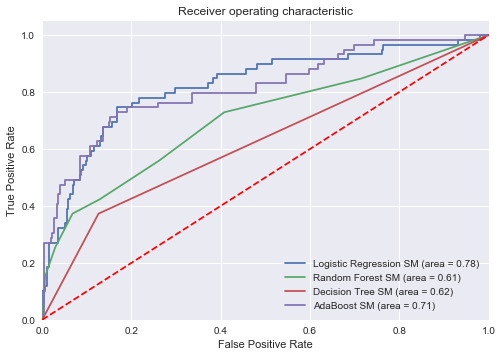

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, M1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, M1.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf_sm.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_sm.predict_proba(X_test)[:,1])


dtree_roc_auc = roc_auc_score(y_test, dtree_sm.predict(X_test))
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree_sm.predict_proba(X_test)[:,1])

ada_roc_auc = roc_auc_score(y_test, ada_sm.predict(X_test))
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada_sm.predict_proba(X_test)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression SM (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest SM (area = %0.2f)' % rf_roc_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree SM (area = %0.2f)' % dtree_roc_auc)
plt.plot(ada_fpr, ada_tpr, label='AdaBoost SM (area = %0.2f)' % ada_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

*From the above ROC Graph, we see Logistic Regression Model has highest area under curve value of 0.76 using SMOTE and it is closest to the top left corner which is one of the criteria for a good model.*

In [85]:
from sklearn.metrics import recall_score
print('Recall Results across Models on SMOTE train Dataset')
print('---------------------------------------------------')
report_sm = []
report_sm.append(('LR   ',M1))
report_sm.append(('ADA  ',ada_sm))
report_sm.append(('DTREE',dtree_sm))
report_sm.append(('RF   ',rf_sm))

for name, model in report_sm:
    message = "%s:                 %f " % (name, recall_score(y_test, model.predict(X_test)))
    print (message)
#print(recall_score(y_test, ada.predict(X_test)))

Recall Results across Models on SMOTE train Dataset
---------------------------------------------------
LR   :                 0.762712 
ADA  :                 0.491525 
DTREE:                 0.372881 
RF   :                 0.254237 


*Based on the above results across different models, we see that the Logistic Regression has the highest recall score. When an employee left the company, how often the model predict that correctly depends on the "recall" score.*

*High recall score means when employees left the company, model predicted correctly most of the time.*

**Note: A good recall score is important to avoid unpredicted loss of the employees in the company.**

### Summary  Report for Balanced Dataset using SMOTE :-

*From the above work done based on recall score, I see that best model (AdaBoost) for imbalanced dataset has changed to M1 (Logistic Regression) model with tuning parameter 'C=10'.*

*AdaBoost Model which was the best model on **Imbalanced Dataset** is second best model as it has lower recall value when applied on **Balanced Dataset**.*

### Future work:

- Tuning hyper-parameters for all other algorithms I used (except for Logistic Regression).

- Apply other resampling techniques.